# Esercitazione 10
2 - 5 Maggio 2023

In [63]:
import numpy as np
import scipy.linalg as splin
import RisolviSis
import matplotlib.pyplot as plt

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [64]:
def eqnorm(A, b):
    G = A.T @ A
    y = A.T @ b
    L = splin.cholesky(G, lower=True)
    z, flag = RisolviSis.Lsolve(L, y)
    
    if flag == 0:
        x, flag = RisolviSis.Usolve(L.T, z)

    return x


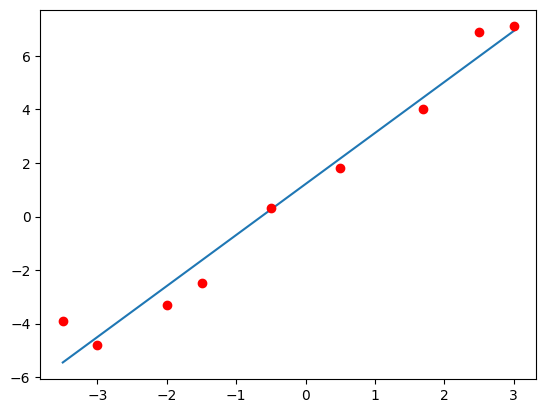

2.2258970863642764


In [65]:
x = np.array([-3.5, -3,-2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9,-4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = x.shape[0]
n = 1 # grado del polinomio
#n = 2
n1 = n + 1 # gradi di libertà del polinomio di grado n, il suo ordine
# La matrice va tagliata per seguire l'algoritmo e non va considerata tutta
B = np.vander(x, increasing=True)[:, :n1]
a = eqnorm(B, y)
xv = np.linspace(np.min(x), np.max(x), 200)

# Etichette restituite
pol1 = np.polyval(np.flip(a), xv)
plt.plot(xv, pol1, x, y, 'ro')
plt.show()

# Errore: norma 2 al quadrato in corrispondenza dei valori in x.
# Con valori di n sempre più maggiori il metodo ha un errore migliore
# ma più il valore di n è alto è peggio è. Si procede con fattorizzazione
# QR.
err = np.linalg.norm(y - np.polyval(np.flip(a), x))
print(err)

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [66]:
def qrLS(A, b):
    n = A.shape[1]
    Q, R = splin.qr(A)
    
    # Risolvo il sistema triangolare superiore: prime n righe e tutte le colonne
    # per avere una matrice quadrata
    h = Q.T @ b
    x, flag = RisolviSis.Usolve(R[0:n, :], h[0:n])
    residuo = np.linalg.norm(h[n:])

    return x, residuo


1.644902897842775


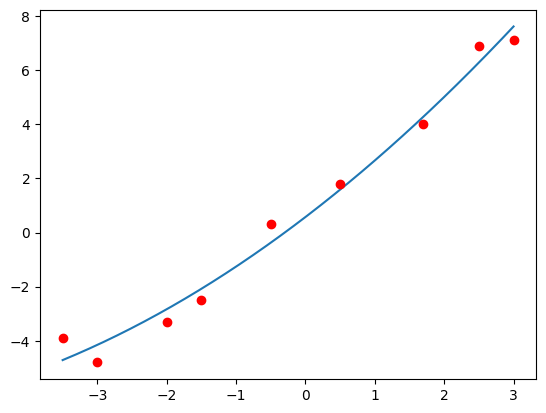

1.644902897842774


In [67]:
x = np.array([-3.5, -3,-2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9,-4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = x.shape[0]
n = 1 # grado del polinomio
#n = 2
n1 = n + 1 # gradi di libertà del polinomio di grado n, il suo ordine
# La matrice va tagliata per seguire l'algoritmo e non va considerata tutta
B = np.vander(x, increasing=True)[:, :n1]
a, residuo = qrLS(B, y)
print(residuo)
xv = np.linspace(np.min(x), np.max(x), 200)

# Etichette restituite
pol1 = np.polyval(np.flip(a), xv)
plt.plot(xv, pol1, x, y, 'ro')
plt.show()

# Errore: norma 2 al quadrato in corrispondenza dei valori in x.
# Con valori di n sempre più maggiori il metodo ha un errore migliore
# ma più il valore di n è alto è peggio è. Si procede con fattorizzazione
# QR.
err = np.linalg.norm(y - np.polyval(np.flip(a), x))
print(err)

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.

